# Template for reading in and plotting a Fortran butterfly diagram file


In [5]:
paramfile = 'kd3parameters.txt'
with open(paramfile) as pfile:
    params = pfile.readlines()
    params = [x.strip() for x in params] 
    
nDays = params[0]
np = params[1]
nr = params[2]
OMEGA_E = params[3]
L0 = params[4]
ETA0 = params[5]
ALPHA0 = params[6]
bEq = params[7]
bQuench = params[8]
    
pfile.close()

# Butterfly diagram with emergence probability {{tubeP1}}, resolution {{np}} x {{nr}}, beq = {{bEq}}, tube size x{{tubesize}}, run for {{nDays}} days

## Reasons for parameter choices: ...

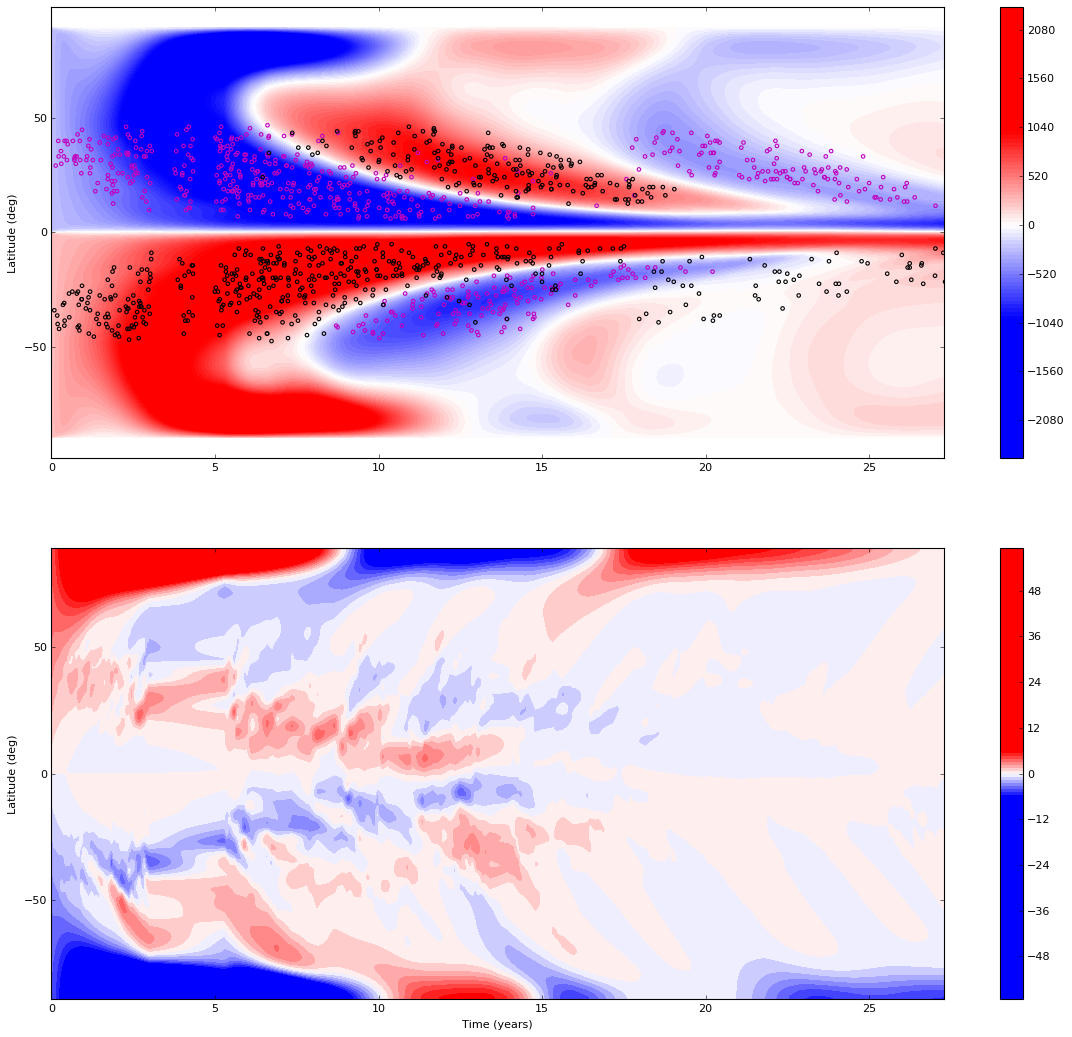

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools

bfile = 'bfly.dat'
tubefile = 'tubes.dat'

filerange = 172   # Length of data file used in iteration below which may need changing depending on file size - needs work!

# Read butterfly diagram

f = open(bfile, 'rb')
# Read in ny (length of each column) and theta
hr = np.fromfile(f, dtype='int32', count=1)
ny = np.fromfile(f, dtype='int32', count=1)
he = np.fromfile(f, dtype='int32', count=2)
th = np.fromfile(f, dtype='float', count=ny)
hr = np.fromfile(f, dtype='int32', count=2)
# Read in initial t, bx, bz
t = np.fromfile(f, dtype='float', count=1)
hr = np.fromfile(f, dtype='int32', count=2)
bx = np.fromfile(f, dtype='float', count=ny)
hr = np.fromfile(f, dtype='int32', count=2)
bz = np.fromfile(f, dtype='float', count=ny)
hr = np.fromfile(f, dtype='int32', count=1)
# Read in the rest...
hr = np.fromfile(f, dtype='int32', count=1)
t = np.append(t, np.fromfile(f, dtype='float', count=1))
hr = np.fromfile(f, dtype='int32', count=2)
bx = np.concatenate(([bx], [np.fromfile(f, dtype='float', count=ny)]))
hr = np.fromfile(f, dtype='int32', count=2)
bz = np.concatenate(([bz], [np.fromfile(f, dtype='float', count=ny)]))
hr = np.fromfile(f, dtype='int32', count=1)
for i in range(filerange):   # The range may need changing depending on file size - needs work
    hr = np.fromfile(f, dtype='int32', count=1)
    t = np.append(t, np.fromfile(f, dtype='float', count=1))
    hr = np.fromfile(f, dtype='int32', count=2)
    bx = np.concatenate((bx, [np.fromfile(f, dtype='float', count=ny)]))
    hr = np.fromfile(f, dtype='int32', count=2)
    bz = np.concatenate((bz, [np.fromfile(f, dtype='float', count=ny)]))
    hr = np.fromfile(f, dtype='int32', count=1)
f.close()

# Correct units

bCorrect = -250
bx = bx*bCorrect
bz = bz*bCorrect
bx = np.transpose(bx)
bz = np.transpose(bz)

ETA0 = 1.6e11
L0 = 6.96e10
t = t*L0**2/ETA0/86400.0/365.25
tmax=max(t)
lat = 90 - th*180/np.pi


# Read in emergence data


with open(tubefile) as f_in:
        tt,pht,tht,rt,drt = np.genfromtxt(itertools.islice(f_in, 0, None, 2),unpack=True,usecols=[0,1,2,3,4])
f_in.close()

with open(tubefile) as f_in2:
        fluxt = np.genfromtxt(itertools.islice(f_in2, 1, None, 2),unpack=True,usecols=[0])
f_in2.close()


tt = tt*L0**2/ETA0/86400.0/365.25;
pht = pht*180/np.pi; 
latt = 90 - tht*180/np.pi; 


# Plot butterfly diagrams with superimposed eruption positions


cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","w","r"])

fig1 = plt.figure(figsize=(18,16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(211)
#bands = np.linspace(-1000, 1000, 150, endpoint=True)  # This is to change colorbar axes but is not optimal - needs work
#plt.contourf(t,lat,bx,bands,extend='both',cmap=cm1)   # Same as above
plt.contourf(t,lat,bx,150,cmap=cm1,vmin=-1000,vmax=1000)
plt.colorbar()
plt.ylabel('Latitude (deg)')
plt.xlim(0,tmax)


plt.scatter(tt[fluxt>0],latt[fluxt>0],10,facecolor='none',edgecolor='m')
plt.scatter(tt[fluxt<0],latt[fluxt<0],10,facecolor='none',edgecolor='k')

plt.subplot(212)
#bands2 = np.linspace(-6, 6, 150, endpoint=True)
#plt.contourf(t,lat,bz,bands2,extend='both',cmap=cm1)
plt.contourf(t,lat,bz,150,cmap=cm1,vmin=-6,vmax=6)
plt.colorbar()
plt.xlabel('Time (years)')
plt.ylabel('Latitude (deg)')
plt.xlim(0,tmax)

plt.show()

# Unsigned and polar fluxes

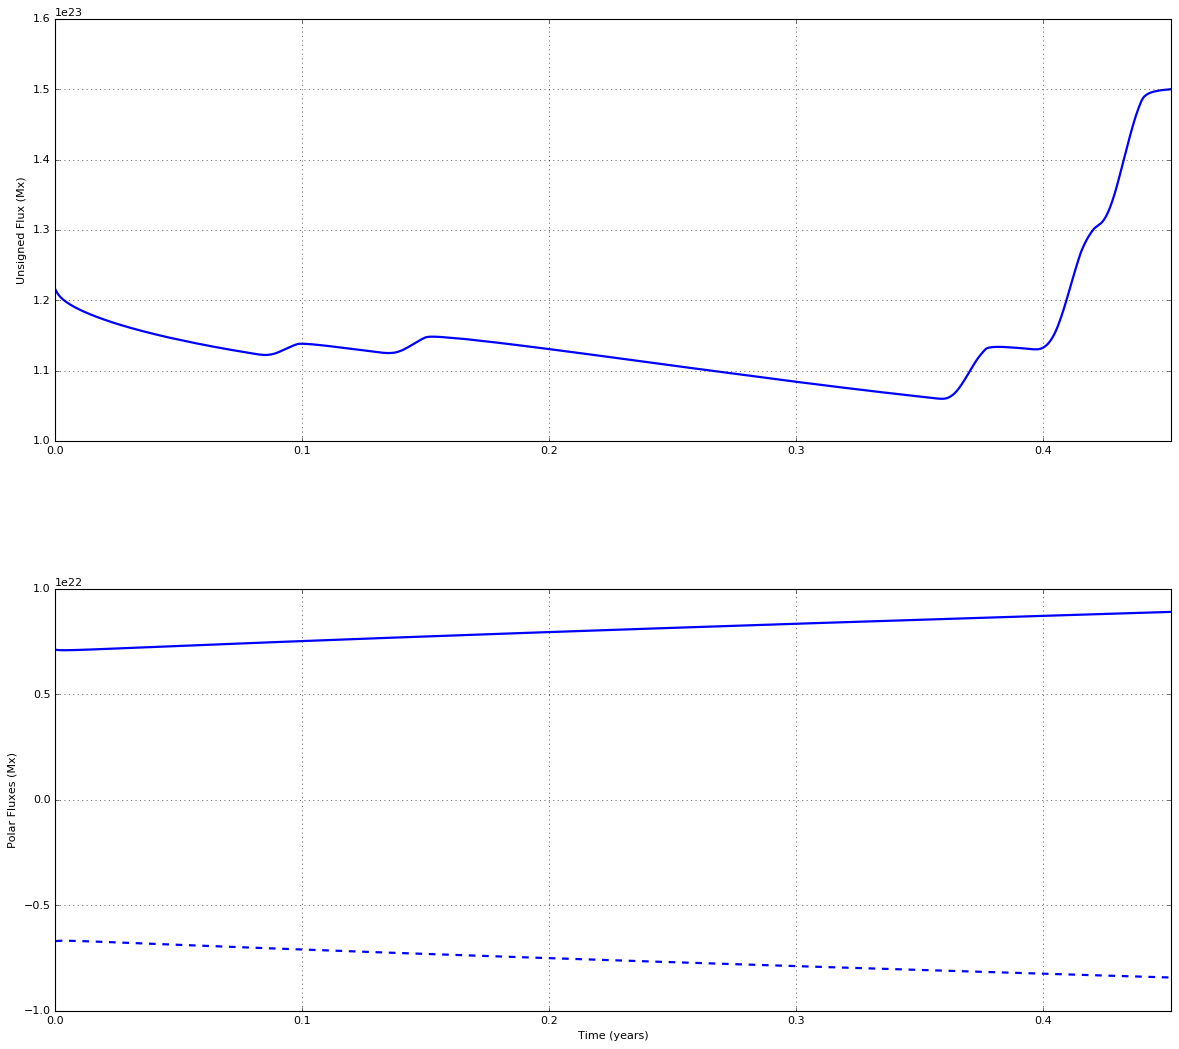

In [4]:
# Read in flux data

fluxfile = 'diagnostics.dat'

with open(fluxfile) as f_in3:
        t,un,us,pn,ps = np.genfromtxt(f_in3,unpack=True,usecols=[0,1,2,3,4])
f_in3.close()

# Correct units

bCorrect = -250
ETA0 = 1.6e11
L0 = 6.96e10

t = t*L0**2/ETA0/86400.0/365.25
tmax = np.max(t)


un = un*np.abs(bCorrect)
us = us*np.abs(bCorrect)
pn = pn*bCorrect
ps = ps*bCorrect

f = un+us


# Plot unsigned and polar flux


fig3 = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.subplots_adjust(hspace=0.35)

plt.plot(t,f,'b',linewidth=2)
plt.ylabel('Unsigned Flux (Mx)')
plt.xlim(0,tmax)
plt.grid()


plt.subplot(212)
plt.plot(t,pn,linewidth=2)
plt.plot(t,ps,'b--',linewidth=2)
plt.xlabel('Time (years)')
plt.ylabel('Polar Fluxes (Mx)')
plt.xlim(0,tmax)
plt.grid()


plt.show()